<a href="https://colab.research.google.com/github/Muqadisa/ML-repository/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import fetch_openml



In [ ]:
from sklearn.datasets import fetch_openml

liver = fetch_openml(name="liver-disorders", as_frame=True)

In [ ]:
print(liver.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [ ]:

liver.target

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
340    12.0
341    12.0
342    15.0
343    16.0
344    20.0
Name: drinks, Length: 345, dtype: float64

In [ ]:
#make a dataframe from the given data
liver_df = pd.DataFrame(liver.data, columns=liver.feature_names)
liver_df.head()

,mcv,alkphos,sgpt,sgot,gammagt
0,85.0,92.0,45.0,27.0,31.0
1,85.0,64.0,59.0,32.0,23.0
2,86.0,54.0,33.0,16.0,54.0
3,91.0,78.0,34.0,24.0,36.0
4,87.0,70.0,12.0,28.0,10.0


In [ ]:

#add target value to the dataset
liver_df['drinks'] = liver.target

In [ ]:
liver_df.head()

,mcv,alkphos,sgpt,sgot,gammagt,drinks
0,85.0,92.0,45.0,27.0,31.0,0.0
1,85.0,64.0,59.0,32.0,23.0,0.0
2,86.0,54.0,33.0,16.0,54.0,0.0
3,91.0,78.0,34.0,24.0,36.0,0.0
4,87.0,70.0,12.0,28.0,10.0,0.0


In [ ]:
liver_df.isnull().sum()

mcv        0
alkphos    0
sgpt       0
sgot       0
gammagt    0
drinks     0
dtype: int64

In [ ]:
liver_df = liver_df.dropna(1)
print(liver_df.dtypes)
#dia_df = dia_df.drop('patient', axis=1)

mcv        float64
alkphos    float64
sgpt       float64
sgot       float64
gammagt    float64
drinks     float64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


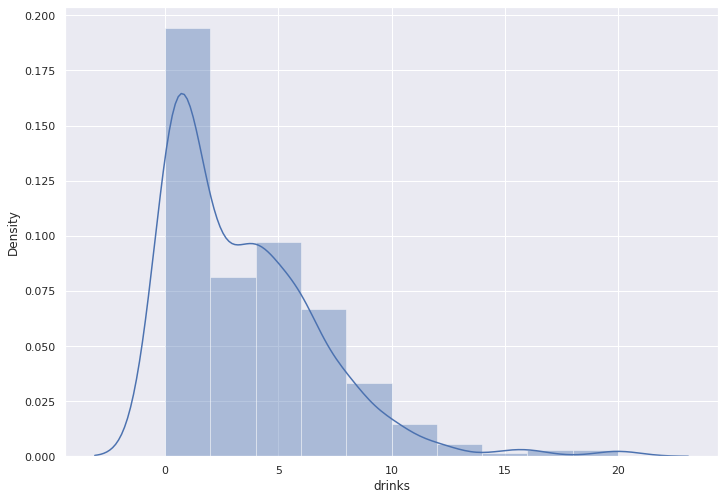

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(liver_df['drinks'], bins=10)
plt.show()

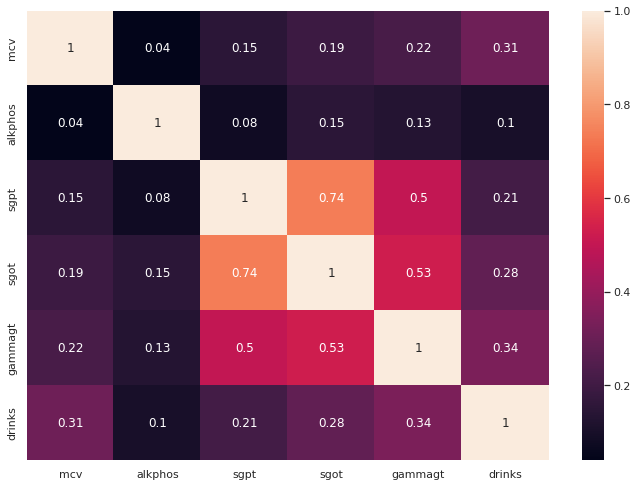

In [ ]:
correlation_matrix = liver_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

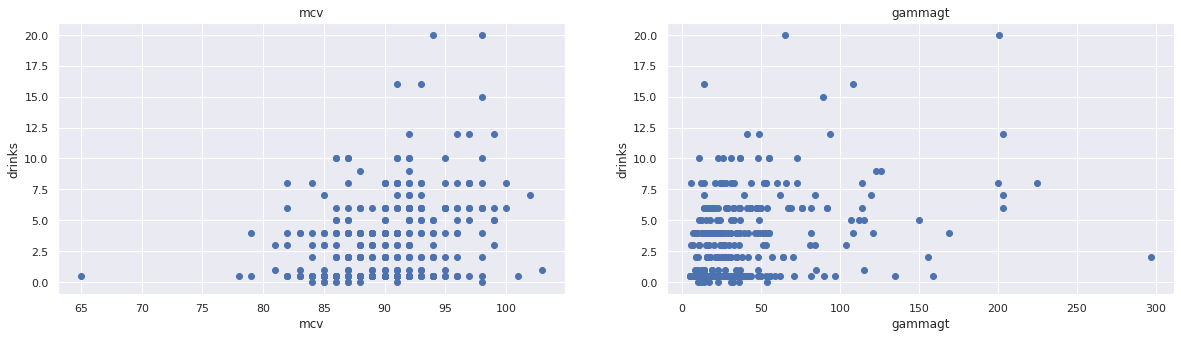

In [ ]:
plt.figure(figsize=(20, 5))

features = ['mcv','gammagt']
target = liver_df['drinks']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = liver_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('drinks')

In [ ]:
print(liver_df.isnull().values.any())

False


In [ ]:
#dividing into  X and Y

X = pd.DataFrame(np.c_[liver_df['mcv'], liver_df['gammagt']], columns = ['mcv','gammagt'])
y = liver_df['drinks']

print(X.dtypes)
print(y.dtypes)

mcv        float64
gammagt    float64
dtype: object
float64


In [ ]:
#dividing into test and train 

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(276, 2)
(69, 2)
(276,)
(69,)


In [ ]:
#training and testing model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
testPred = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 2.8907485802025943
R2 score is 0.17169259561540728


The model performance for testing set
--------------------------------------
RMSE is 12.80955203369825
R2 score is 0.13559013171131618


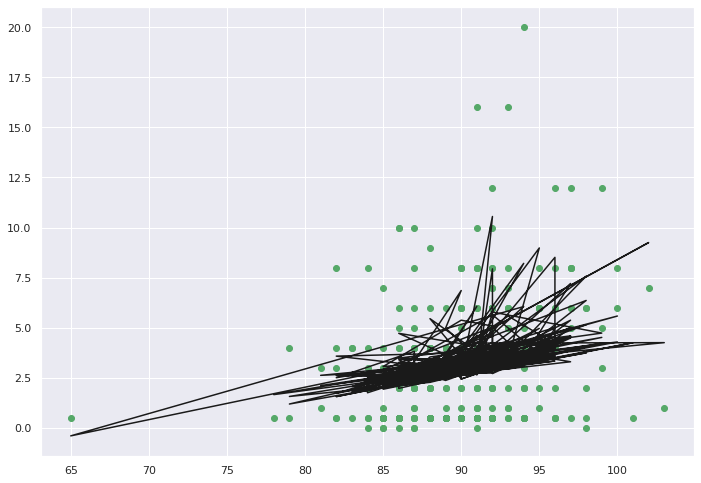

In [ ]:
#plot to see
plt.scatter(X_train['mcv'], Y_train,color='g') 
#plt.scatter(X_train['YearRemodAdd'], Y_train,color='b') 
plt.plot(X_train['mcv'], y_train_predict,color='k') 



plt.show()

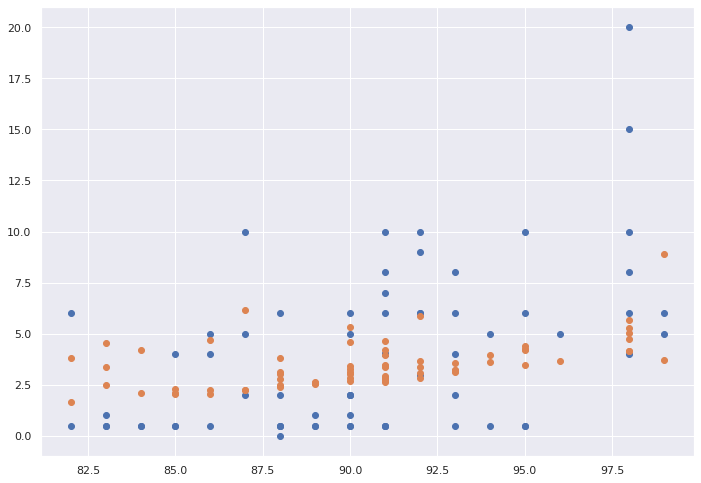

In [ ]:
plt.scatter(X_test['mcv'],Y_test)
plt.scatter(X_test['mcv'],y_test_predict)
plt.show()